In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [4]:
input_dataframe = pd.read_csv("input.csv")

### Looking at head of the data we see that we have following 4 Features 
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 

### The last column is the label of the observation 
1. class (integer) - weather the note is authentic of fake 

In [5]:
input_dataframe.head()

,v,s,c,e,output
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# 1. EDA
-  Plotting scatter plots to understand the extent of correlation among features. 

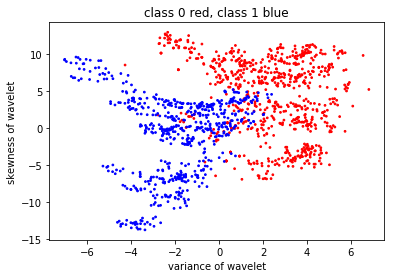

In [6]:
# assign different colors to each feature 
colors = {0: "red", 1: "blue"}
v = input_dataframe[['v']]
s = input_dataframe[['s']]
c = input_dataframe[['c']] 
e = input_dataframe[['e']]
output = input_dataframe[['output']].values

plt.scatter(v,s,c = [colors[cl[0]] for cl in output], s=3)
plt.title("class 0 red, class 1 blue")
plt.xlabel("variance of wavelet")
plt.ylabel("skewness of wavelet")
plt.rcParams['axes.facecolor'] = 'white'

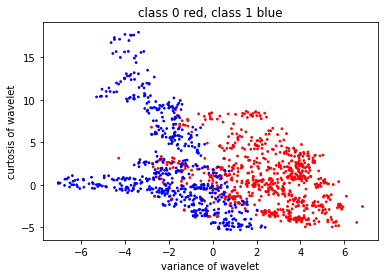

In [7]:
plt.scatter(v,c,c = [colors[cl[0]] for cl in output], s=3)
plt.title("class 0 red, class 1 blue")
plt.xlabel("variance of wavelet")
plt.ylabel("curtosis of wavelet")

#input_dataframe.describe()

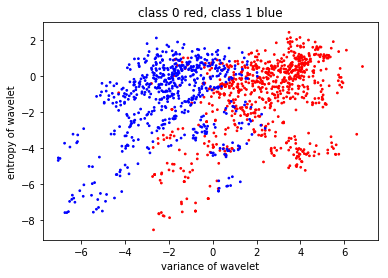

In [8]:
plt.scatter(v,e,c = [colors[cl[0]] for cl in output], s=3)
plt.title("class 0 red, class 1 blue")
plt.xlabel("variance of wavelet")
plt.ylabel("entropy of wavelet")

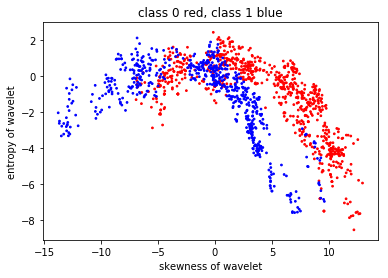

In [9]:
plt.scatter(s,e,c = [colors[cl[0]] for cl in output], s=3)
plt.title("class 0 red, class 1 blue")
plt.xlabel("skewness of wavelet")
plt.ylabel("entropy of wavelet")

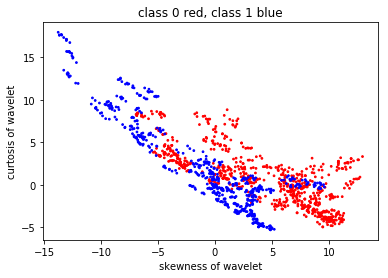

In [10]:
plt.scatter(s,c,c = [colors[cl[0]] for cl in output], s=3)
plt.title("class 0 red, class 1 blue")
plt.xlabel("skewness of wavelet")
plt.ylabel("curtosis of wavelet")

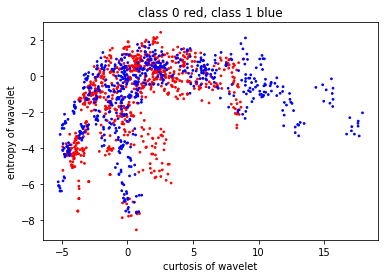

In [11]:
plt.scatter(c,e,c = [colors[cl[0]] for cl in output] , s=3)
plt.title("class 0 red, class 1 blue")
plt.xlabel("curtosis of wavelet")
plt.ylabel("entropy of wavelet")

- plotting box plot among pair of features

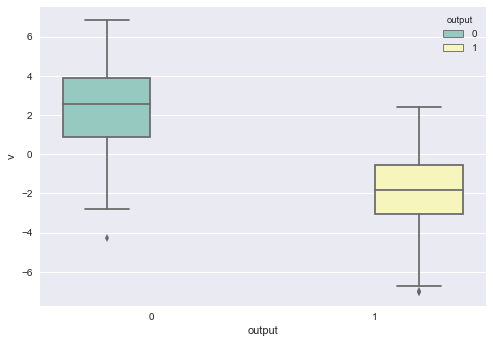

In [12]:
import seaborn as sns
ax = sns.boxplot(x='output',y='v',hue='output',data = input_dataframe,palette = "Set3")

- - box plot of s and output

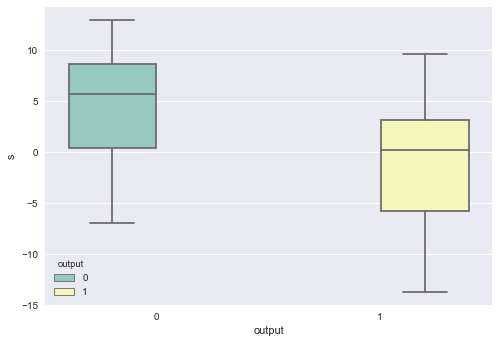

In [13]:
ax = sns.boxplot(x='output',y='s',hue='output',data = input_dataframe,palette = "Set3")

- - boxplot of c and output 

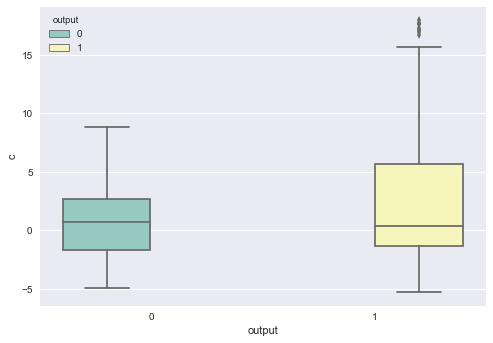

In [14]:
ax = sns.boxplot(x='output',y='c',hue='output',data = input_dataframe,palette = "Set3")

- - boxplot e and output

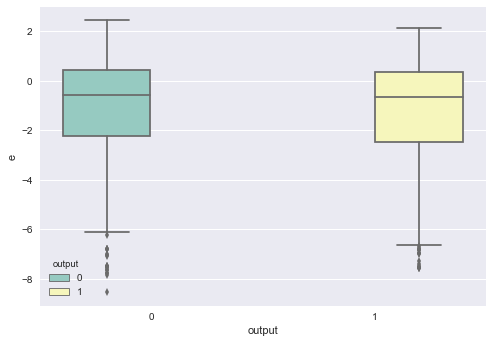

In [15]:
ax = sns.boxplot(x='output',y='e',hue='output',data = input_dataframe,palette = "Set3")

# 2. Splitting data into train and test set 
To have a balanced test set (meaning to have equal represntation of both classes) first 200 instances of both classes (0 and 1) are chosen for testing and rest all the data is used for training 

In [16]:
test_class0 = input_dataframe.loc[input_dataframe['output']== 0].head(200)
#test_class0

In [17]:
train_class0 = input_dataframe.loc[input_dataframe['output']== 0].tail(input_dataframe.loc[input_dataframe['output']== 0].shape[0] - 200)
#train_class0

In [18]:
test_class1 = input_dataframe.loc[input_dataframe['output']== 1].head(200)
#test_class1

In [19]:
train_class1 = input_dataframe.loc[input_dataframe['output']== 1].tail(input_dataframe.loc[input_dataframe['output']== 1].shape[0] - 200)
#train_class1

In [20]:
frames_test = [test_class0,test_class1]
frames_train = [train_class0,train_class1]
test = pd.concat(frames_test)
train = pd.concat(frames_train)

In [21]:
test.shape[0]


400

In [22]:
train.shape[0]


972

In [23]:
x_train = train.iloc[:, :-1].values  
y_train = train.iloc[:, 4].values
x_test = test.iloc[:, :-1].values  
y_test = test.iloc[:, 4].values

# 3. Applying K Nearest Neighbors (KNN) 
- Using Euclidean distance

In [24]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5,metric="euclidean")  
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
y_pred = classifier.predict(x_test)  


In [26]:
from sklearn.metrics import classification_report, confusion_matrix  
print('confusion Matrix')
print(confusion_matrix(y_test, y_pred))  

confusion Matrix
[[200   0]
 [  0 200]]


In [27]:
print('classification report')
print(classification_report(y_test, y_pred))

classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       200
          1       1.00      1.00      1.00       200

avg / total       1.00      1.00      1.00       400



### Parameter tuning
- Finding the best k for KNN by varying k from 1 to 900 in increment of 3 

In [28]:
error = []
kvalue = []
for i in range(1, 901,3):  
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    #print(1.0/i)
    kvalue.append(1.0/i)
    #print(error)

### Plot of 1/k vs Mean error 

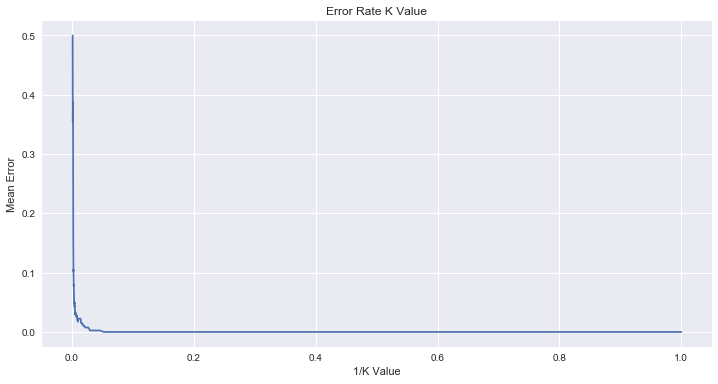

In [29]:
plt.figure(figsize=(12, 6))  
#plt.plot(range(1, 901,3), error)
plt.plot(kvalue, error)
plt.title('Error Rate K Value')  
plt.xlabel('1/K Value')  
plt.ylabel('Mean Error')  

### Plot of k vs Mean error 

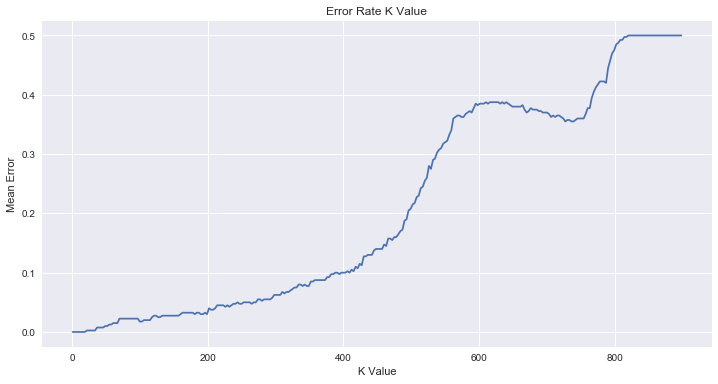

In [30]:
error = []
kvalue = []
for i in range(1, 901,3):  
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 901,3), error)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

# k value is optimal over a range from 1 to 20

### choosing highest value k* = 19

In [31]:
classifier = KNeighborsClassifier(n_neighbors=19,metric="euclidean")  
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [32]:
y_pred = classifier.predict(x_test)  


- Confusion Matrix and classification report   

In [33]:
print('confusion matrix\n')
print(confusion_matrix(y_test, y_pred)) 
print('\nclassification report\n')
print(classification_report(y_test, y_pred))

confusion matrix

[[200   0]
 [  0 200]]

classification report

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       200
          1       1.00      1.00      1.00       200

avg / total       1.00      1.00      1.00       400



# Learning curve 
- Preparing the learning curve by varying the size of
- - training data N from {50, 100, 150, . . . , 900}
     
    - if N = 300 
        - then k form {1,40, 80... 280} 

In [34]:
error = []
for N in range(50,900,50):
    cerror = 1000 
    curri = 0 
    for i in range(1, N,40):
        train_class00 = input_dataframe.loc[input_dataframe['output']== 0].head(N/2)
        test_class00 = input_dataframe.loc[input_dataframe['output']== 0].tail(input_dataframe.loc[input_dataframe['output']== 0].shape[0] - N/2)
        train_class11 = input_dataframe.loc[input_dataframe['output']== 1].head(N/2)
        test_class11 = input_dataframe.loc[input_dataframe['output']== 1].tail(input_dataframe.loc[input_dataframe['output']== 1].shape[0] - N/2)
        
        frames_test = [test_class00,test_class11]
        frames_train = [train_class00,train_class11]
        test = pd.concat(frames_test)
        train = pd.concat(frames_train)
        x_train = train.iloc[:, :-1].values  
        y_train = train.iloc[:, 4].values
        x_test = test.iloc[:, :-1].values  
        y_test = test.iloc[:, 4].values
        knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        if cerror>np.mean(pred_i != y_test):
            cerror = np.mean(pred_i != y_test)
            curri = i
    error.append(cerror)

In [35]:
len(error)

17

### Learning curve

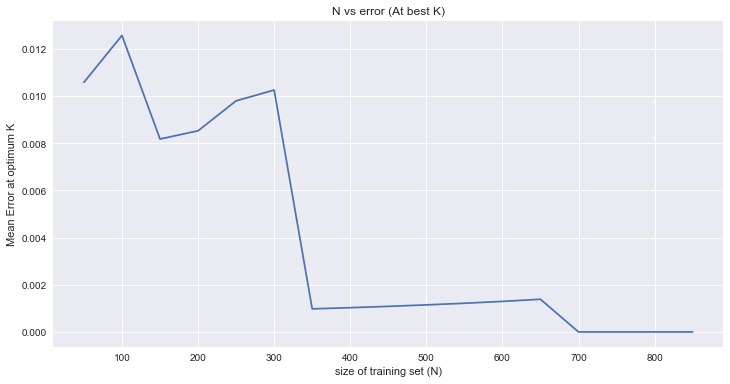

In [36]:
plt.figure(figsize=(12, 6))  
plt.plot(range(50, 900,50), error)
plt.title('N vs error (At best K)')  
plt.xlabel('size of training set (N)')  
plt.ylabel('Mean Error at optimum K')  

# 4. Variants of KNN using different distance 
## 1. minkowski distance with p = 1 i.e. manhattan distance 

    Summerizing the distance used, optimal k, error and p

<table >
  <tr>
    <th>Distance</th>
    <th>K*</th> 
    <th>Error</th>
    <th>p</th>
  </tr>
  <tr>
    <td>Minkowski (Manhattan) </td>
    <td>20</td> 
    <td>0</td>
    <td>1</td>
  </tr>
 <tr>
    <td>Minkowski </td>
    <td>20</td> 
    <td>0</td>
    <td>best log10(p) is (0.1, 0.6 to 1)</td>
  </tr>
  <tr>
    <td>Chebyshev </td>
    <td>20</td> 
    <td>0</td>
    <td>infinity</td>
  </tr>
  <tr>
    <td>Mahalanobis </td>
    <td>11</td> 
    <td>0</td>
    <td></td>
  </tr>
</table>

In [60]:
train_class00 = input_dataframe.loc[input_dataframe['output']== 0].head(200)
test_class00 = input_dataframe.loc[input_dataframe['output']== 0].tail(input_dataframe.loc[input_dataframe['output']== 0].shape[0] - 200)
train_class11 = input_dataframe.loc[input_dataframe['output']== 1].head(200)
test_class11 = input_dataframe.loc[input_dataframe['output']== 1].tail(input_dataframe.loc[input_dataframe['output']== 1].shape[0] - 200)

frames_test = [test_class0,test_class1]
frames_train = [train_class0,train_class1]
test = pd.concat(frames_test)
train = pd.concat(frames_train)
x_train = train.iloc[:, :-1].values  
y_train = train.iloc[:, 4].values
x_test = test.iloc[:, :-1].values  
y_test = test.iloc[:, 4].values

error = []

for i in range(1, 901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,metric="minkowski",p=1)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))



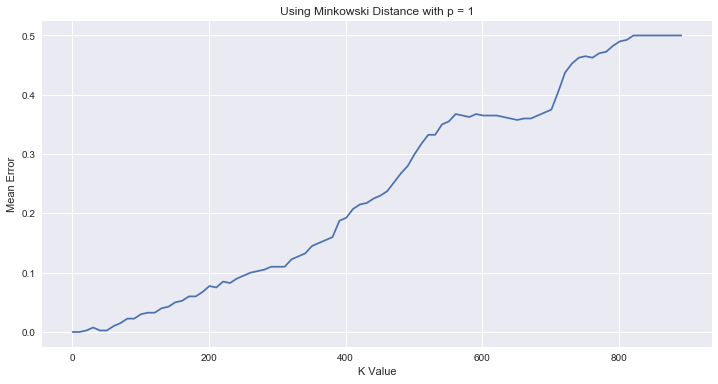

In [61]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 901,10), error)
plt.title('Using Minkowski Distance with p = 1')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [62]:
for i in range(0,3):
    print(error[i])

0.0
0.0
0.0025


optimal  k  for Manhattan Distance is a range  from 1 to 20 k* = 20 and test error is 0 

using k = 19 from above for following with log10(p) belongs to  {0.1,0.2,0.3,...,1}

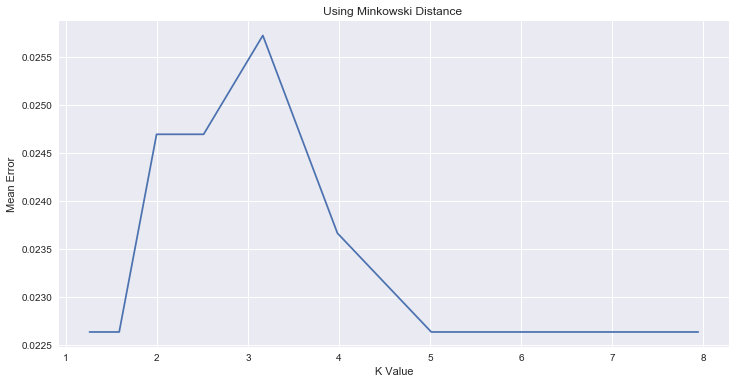

In [64]:
        import math

#error = []
#logvalues = []
#yaxis = []
#for i in range(1, 10,1):  
#    knn = KNeighborsClassifier(n_neighbors=20,metric="minkowski",p=10**(i*0.1))
#    yaxis.append(10**(i*0.1))
#    logvalues.append(10**(i*0.1))
#    knn.fit(x_train, y_train)
#    pred_i = knn.predict(x_test)
#    error.append(np.mean(pred_i != y_test))

        error = []
        logvalues = []
        train_class00 = input_dataframe.loc[input_dataframe['output']== 0].head(200)
        test_class00 = input_dataframe.loc[input_dataframe['output']== 0].tail(input_dataframe.loc[input_dataframe['output']== 0].shape[0] - 200)
        train_class11 = input_dataframe.loc[input_dataframe['output']== 1].head(200)
        test_class11 = input_dataframe.loc[input_dataframe['output']== 1].tail(input_dataframe.loc[input_dataframe['output']== 1].shape[0] - 200)
        
        frames_test = [test_class00,test_class11]
        frames_train = [train_class00,train_class11]
        test = pd.concat(frames_test)
        train = pd.concat(frames_train)
        x_train = train.iloc[:, :-1].values  
        y_train = train.iloc[:, 4].values
        x_test = test.iloc[:, :-1].values  
        y_test = test.iloc[:, 4].values
for i in range(1, 10,1):  
    knn = KNeighborsClassifier(n_neighbors=19,metric="minkowski",p=10**(i*0.1))
    logvalues.append(10**(i*0.1))
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
#plt.plot(range(1, 100,1), error)
plt.plot(logvalues, error)
plt.title('Using Minkowski Distance ')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')




In [65]:
len(logvalues)

9

In [66]:
for i in range(1, 9,1):  
    print(error[i],logvalues[i])

(0.02263374485596708, 1.5848931924611136)
(0.024691358024691357, 1.9952623149688797)
(0.024691358024691357, 2.51188643150958)
(0.0257201646090535, 3.1622776601683795)
(0.023662551440329218, 3.981071705534973)
(0.02263374485596708, 5.011872336272724)
(0.02263374485596708, 6.309573444801933)
(0.02263374485596708, 7.943282347242816)


best log10(p) is (0.1, 0.6 to 1)

## 2. Chebyshev Distance 

In [88]:
import math

train_class00 = input_dataframe.loc[input_dataframe['output']== 0].head(200)
test_class00 = input_dataframe.loc[input_dataframe['output']== 0].tail(input_dataframe.loc[input_dataframe['output']== 0].shape[0] - 200)
train_class11 = input_dataframe.loc[input_dataframe['output']== 1].head(200)
test_class11 = input_dataframe.loc[input_dataframe['output']== 1].tail(input_dataframe.loc[input_dataframe['output']== 1].shape[0] - 200)

frames_test = [test_class0,test_class1]
frames_train = [train_class0,train_class1]
test = pd.concat(frames_test)
train = pd.concat(frames_train)
x_train = train.iloc[:, :-1].values  
y_train = train.iloc[:, 4].values
x_test = test.iloc[:, :-1].values  
y_test = test.iloc[:, 4].values

error = []


for i in range(1, 901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,metric="minkowski",p = float('inf'))
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))





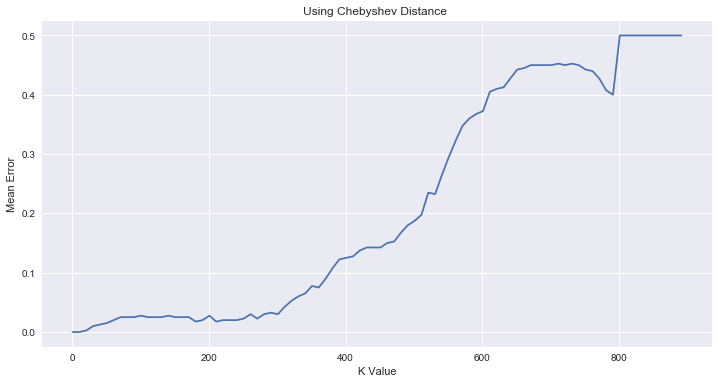

In [89]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 901,10), error)
plt.title('Using Chebyshev Distance ')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

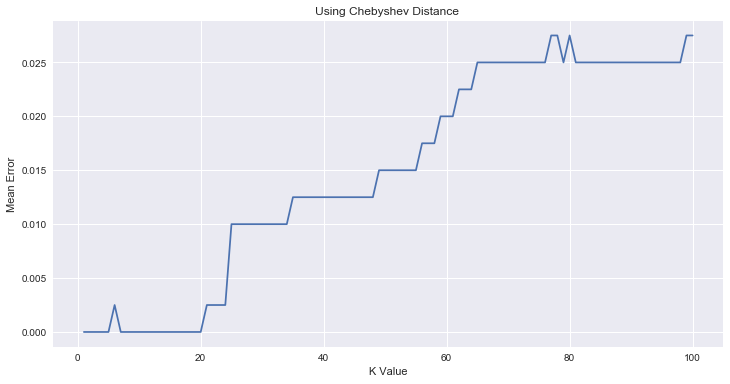

In [87]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 101,1), error)
plt.title('Using Chebyshev Distance ')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

lowest error is 0 in the range as per above 
K* is 20 

## 3. Mahalanobis distance 

optimal k was found to be 11

In [90]:
error = []
kinverse = []
for i in range(1, 901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute',metric="mahalanobis",metric_params={'VI': np.cov(x_train)})
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    kinverse.append(1.0/i)


## what should be the V ? for mahalanobis distance? 

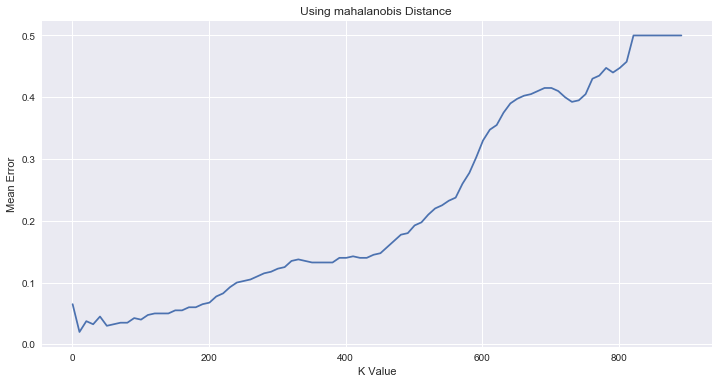

In [91]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 901,10), error)
plt.title('Using mahalanobis Distance ')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

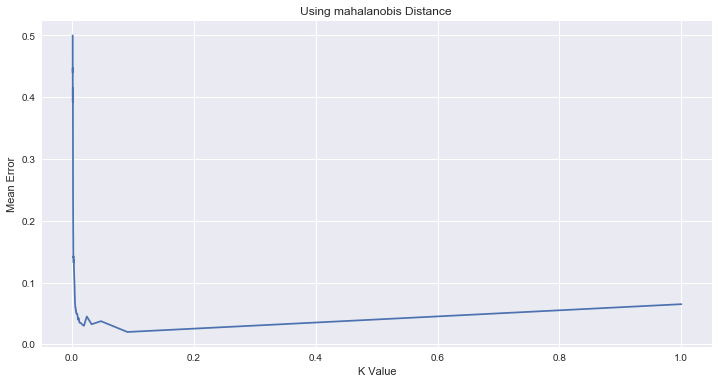

In [93]:
plt.figure(figsize=(12, 6))  
plt.plot(kinverse, error)
plt.title('Using mahalanobis Distance ')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

# 5. using distance as weights in making impact on class 
the lower distance points have more affect on decision making than the one furthur away 

### 1. manhattan

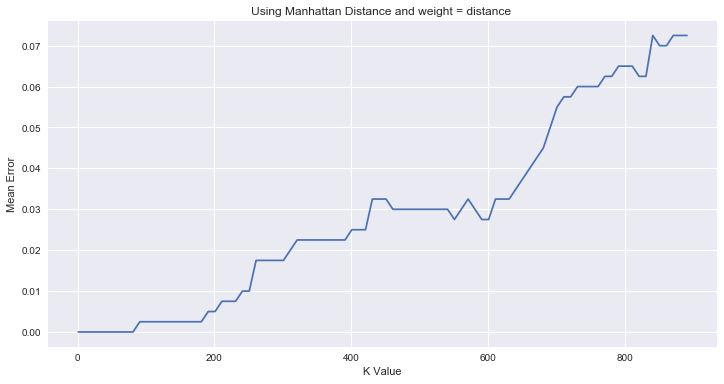

In [103]:
error = []

for i in range(1, 901,10):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',metric="minkowski",p=1)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 901,10), error)
plt.title('Using Manhattan Distance and weight = distance ')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

test error is 0 fof k =1 to 81 than it increses a bit 
k* = 81

### 2. euclidean

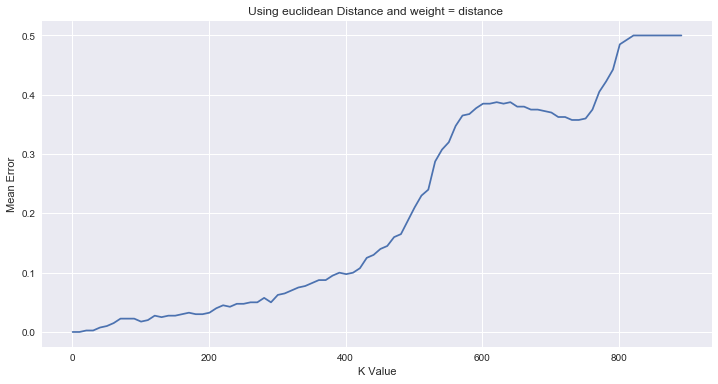

In [107]:
error = []

for i in range(1, 901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 901,10), error)
plt.title('Using euclidean Distance and weight = distance ')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

error is 0 from k = 1 to 20
k* chosen is 20 for eucliadian 

### 3. Chebyshev 

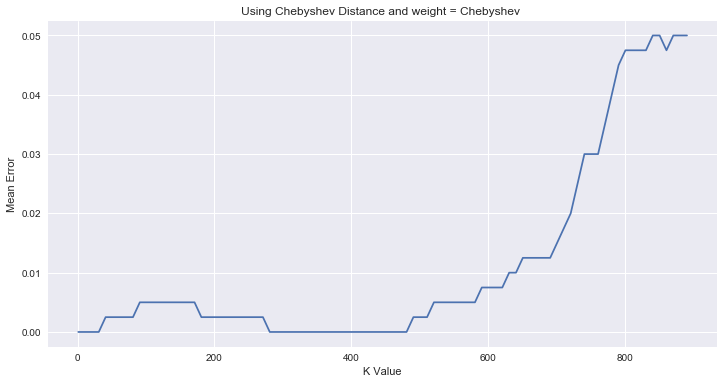

In [113]:
error = []
ck = []
for i in range(1, 901,10):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',metric="minkowski",p=float('inf'))
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    ck.append(1.0/i)

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 901,10), error)
#plt.plot(ck, error)
plt.title('Using Chebyshev Distance and weight = Chebyshev ')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

test error is 0 till k = 38
k* chosen is 37